# Project: Write A Data Science Blog Post

**Data source: Seattle and Boston AirBNB data (http://insideairbnb.com/get-the-data.html)**

First, let's do the below before start:
<br>
i) Assign working directory
<br>
ii) Read in necessary libraries
<br>
ii) Import the data

In [ ]:
## Assign working directory

In [1]:
cd C:\Users\eyanney\Udacity Data Scientist

C:\Users\eyanney\Udacity Data Scientist


In [2]:
## Read in necessary libraries
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

from re import sub
from decimal import Decimal
from sklearn.feature_extraction.text import CountVectorizer

### To change the columns' display setting
pd.set_option('display.max_colwidth', -1)

In [3]:
## Import the data

##**Seattle**##
s_calendar = pd.read_csv('./Term 2/Write A Data Science Blog Post/seattle/calendar.csv')
s_listings = pd.read_csv('./Term 2/Write A Data Science Blog Post/seattle/listings.csv')
s_reviews = pd.read_csv('./Term 2/Write A Data Science Blog Post/seattle/reviews.csv')

##**Boston**##
b_calendar = pd.read_csv('./Term 2/Write A Data Science Blog Post/boston/calendar.csv')
b_listings = pd.read_csv('./Term 2/Write A Data Science Blog Post/boston/listings.csv')
b_reviews = pd.read_csv('./Term 2/Write A Data Science Blog Post/boston/reviews.csv')

## Concatenate "Seattle" & "Boston" ##
calendar = pd.concat([s_calendar.assign(city='Seattle'), b_calendar.assign(city='Boston')], sort=False)
listings = pd.concat([s_listings.assign(city='Seattle'), b_listings.assign(city='Boston')], sort=False)
reviews = pd.concat([s_reviews.assign(city='Seattle'), b_reviews.assign(city='Boston')], sort=False)

### Question 1

**Any seasonality impact to AirBNB monthly average rental from both Seattle and Boston cities ?**

In [4]:
# Convert the "price" to numeric
calendar = calendar.assign(price_value=calendar[['price']].replace('[\$,]','',regex=True).astype(float)) 
calendar = calendar.assign(date_format=pd.to_datetime(calendar['date'], format="%Y-%m-%d"))
calendar = calendar.assign(year=calendar['date_format'].dt.year, month=calendar['date_format'].dt.month, day=calendar['date_format'].dt.day, month_year=calendar['date_format'].dt.strftime('%Y-%m'))

In [5]:
BMH = [5, 6, 7, 8, 9, 10]
BMS = [3, 4]
BML = [1, 2, 11, 12]
SMH = [6, 7, 8]
SMS = [4, 5, 9, 10]
SML = [1, 2, 3, 11, 12]

conditions = [
    (((calendar['city'] == 'Boston') & (calendar['month'].isin(BMH))) | 
     ((calendar['city'] == 'Seattle') & (calendar['month'].isin(SMH)))),    
    (((calendar['city'] == 'Boston') & (calendar['month'].isin(BMS))) | 
     ((calendar['city'] == 'Seattle') & (calendar['month'].isin(SMS)))),    
    (((calendar['city'] == 'Boston') & (calendar['month'].isin(BML))) | 
     ((calendar['city'] == 'Seattle') & (calendar['month'].isin(SML))))]
seasonality = ['High', 'Shoulder', 'Low']

calendar['seasonality'] = np.select(conditions, seasonality, default='NA')

In [6]:
calendar.head()

,listing_id,date,available,price,city,price_value,date_format,year,month,day,month_year,seasonality
0,241032,2016-01-04,t,$85.00,Seattle,85.0,2016-01-04,2016,1,4,2016-01,Low
1,241032,2016-01-05,t,$85.00,Seattle,85.0,2016-01-05,2016,1,5,2016-01,Low
2,241032,2016-01-06,f,NaN,Seattle,NaN,2016-01-06,2016,1,6,2016-01,Low
3,241032,2016-01-07,f,NaN,Seattle,NaN,2016-01-07,2016,1,7,2016-01,Low
4,241032,2016-01-08,f,NaN,Seattle,NaN,2016-01-08,2016,1,8,2016-01,Low


In [7]:
# Only study records with available = 't'
calendar_t = calendar[calendar.available == 't']

In [8]:
calendar_t.head()

,listing_id,date,available,price,city,price_value,date_format,year,month,day,month_year,seasonality
0,241032,2016-01-04,t,$85.00,Seattle,85.0,2016-01-04,2016,1,4,2016-01,Low
1,241032,2016-01-05,t,$85.00,Seattle,85.0,2016-01-05,2016,1,5,2016-01,Low
9,241032,2016-01-13,t,$85.00,Seattle,85.0,2016-01-13,2016,1,13,2016-01,Low
10,241032,2016-01-14,t,$85.00,Seattle,85.0,2016-01-14,2016,1,14,2016-01,Low
14,241032,2016-01-18,t,$85.00,Seattle,85.0,2016-01-18,2016,1,18,2016-01,Low


In [9]:
# Average rental price by City & Months
avg_rental = calendar_t.groupby(['city', 'month_year']).agg({'price_value':'mean'}).rename(columns={'price_value':'avg_price'})
print(avg_rental)

                     avg_price
city    month_year            
Boston  2016-09     252.677308
        2016-10     233.416248
        2016-11     202.924416
        2016-12     192.601915
        2017-01     182.799671
        2017-02     180.961028
        2017-03     181.818742
        2017-04     197.252890
        2017-05     193.712295
        2017-06     196.535302
        2017-07     202.486309
        2017-08     203.330142
        2017-09     194.658331
Seattle 2016-01     121.568409
        2016-02     124.293927
        2016-03     128.644488
        2016-04     135.097005
        2016-05     139.538183
        2016-06     147.473137
        2016-07     152.094150
        2016-08     150.656594
        2016-09     143.255949
        2016-10     137.031939
        2016-11     135.688738
        2016-12     137.251835
        2017-01     136.882590


[Text(0, 0, '2016-01'),
 Text(0, 0, '2016-02'),
 Text(0, 0, '2016-03'),
 Text(0, 0, '2016-04'),
 Text(0, 0, '2016-05'),
 Text(0, 0, '2016-06'),
 Text(0, 0, '2016-07'),
 Text(0, 0, '2016-08'),
 Text(0, 0, '2016-09'),
 Text(0, 0, '2016-10'),
 Text(0, 0, '2016-11'),
 Text(0, 0, '2016-12'),
 Text(0, 0, '2017-01'),
 Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-04'),
 Text(0, 0, '2017-05'),
 Text(0, 0, '2017-06'),
 Text(0, 0, '2017-07'),
 Text(0, 0, '2017-08'),
 Text(0, 0, '2017-09')]

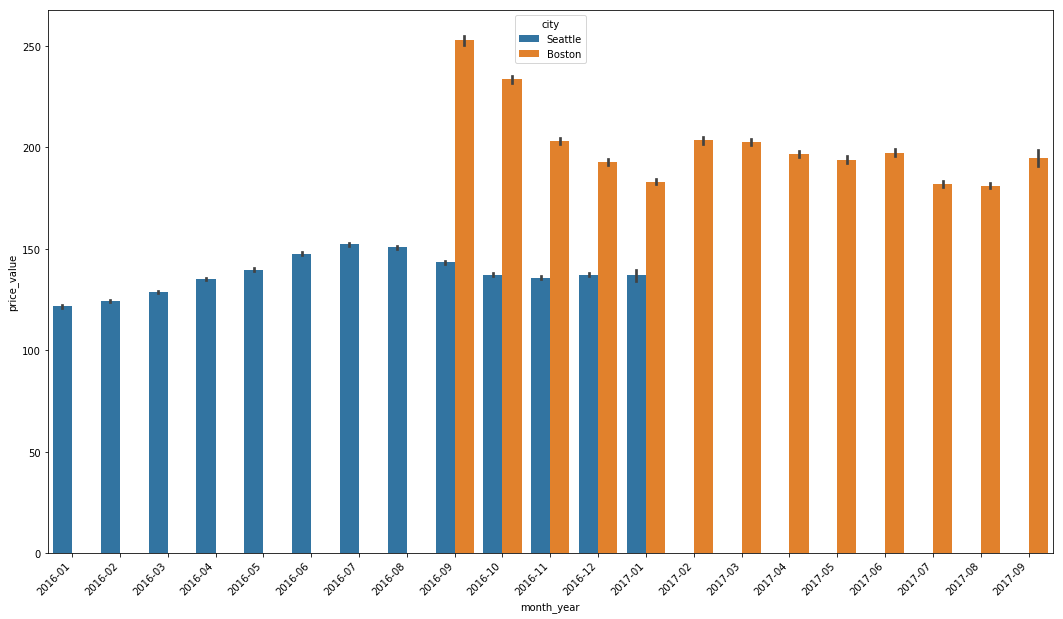

In [10]:
# Bar graph by City #
fig, ax = plt.subplots(figsize=(18,10))
fig = sns.barplot(x='month_year', y='price_value', hue='city', data=calendar_t, ax=ax)
x_dates = calendar_t['date_format'].dt.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [11]:
# Average price & listing ID by City
price_by_city = calendar_t.groupby(['city']).agg({'price_value':'mean', 'listing_id':'nunique'}).rename(columns={'price_value':'avg_price', 'listing_id':'id_cnt'})
print (price_by_city)

          avg_price  id_cnt
city                       
Boston   198.438909  2906  
Seattle  137.944859  3723  


In [12]:
# Average price for different seasonality by City
seasonality_price = calendar_t.groupby(['city', 'seasonality']).agg({'price_value':'mean', 'listing_id':'count'}).rename(columns={'price_value':'avg_price', 'listing_id':'txns'})
print(seasonality_price)

                      avg_price    txns
city    seasonality                    
Boston  High         208.725477  296598
        Low          189.797287  239876
        Shoulder     189.260700  106563
Seattle High         150.045546  227813
        Low          130.266371  391037
        Shoulder     138.723715  315692


***Findings:**

1) Generally, average AirBNB rental fee in Boston is 44% (USD198 vs. USD138) higher than Seattle city.
<br>
2) It seems like the AirBNB pricing is seasonal fluctuations and interestingly, the pricing for both Low and Shoulder seasons are similar in Boston city (i.e. 10% more expensive for High season vs. Shoulder/Low seasons). Whereas in Seattle, it is 8% and 15% cheaper for Shoulder and Low season respectively as compare to High season.

### Question 2

**What type of properties are more costly and is it relatively favorable ?**

In [13]:
display(listings.head(n=2))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,access,interaction,house_rules
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,NaN,NaN,NaN
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy.","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, free parking, ...even free pillows! What's special about this place? Hypo-allergenic bedding, mattresses/covers and new pillows with each rental. (So feel free to take your new pillows with you!) A beautiful restoration mixing period details & modern sensibilities: Hardwood floors throughout, white subway tile, low/no VOCs & non-toxic paints keep this home-away-from-home clean, smart and healthy. Radiant heat and oil radiators mean no blowing hot air or dust. Great Amenities: Free WiFi & internet TV (LED flatscreen). Fully-equipped kitchen with stainless-steel appliances, sink & disposal. Large washer & dryer. Iron/ironing board. Hairdryer. Plenty of storage. Convenient parking, both on- and off-street. The Best Location: Enjoy Seattle's celebrated Macrina bakery, neighborhood cafes, boutiqu","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bac

In [14]:
# Number of records and variables
n_records = len(listings)
n_variables = listings.shape[1]

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of variables: {}".format(n_variables))

Total number of records: 7403
Total number of variables: 95


In [15]:
listings.columns
#listings.dtypes
#list(listings.select_dtypes(include=[np.number]).columns.values)
#list(listings.select_dtypes(include=[np.object]).columns.values)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [16]:
# Convert the "price" to numeric & derive the "hostsince_year"
today = dt.datetime.today()
listings = listings.assign(hostsince_year=((today-pd.to_datetime(listings['host_since'], format="%Y-%m-%d")).dt.days)/365)
listings = listings.assign(hostsince_year_int=listings['hostsince_year'].fillna(0).astype(np.int64))
listings = listings.assign(price_value=listings[['price']].replace('[\$,]','',regex=True).astype(float))

In [17]:
## 'host_since' is missing value ##
listings.loc[listings['hostsince_year_int'] == 0, ['id', 'host_since', 'hostsince_year', 'hostsince_year_int']]

,id,host_since,hostsince_year,hostsince_year_int
1297,8354452,NaN,NaN,0
1419,10235014,NaN,NaN,0


In [18]:
# Only study records with property_type is not null
listings_v =listings.loc[listings['property_type'].notnull()]

In [19]:
# Number of records and variables
n_records_v = len(listings_v)
n_variables_v = listings_v.shape[1]

# Print the results
print("Total number of records: {}".format(n_records_v))
print("Total number of variables: {}".format(n_variables_v))

Total number of records: 7399
Total number of variables: 98


In [20]:
listings_price = listings_v.groupby(['property_type']).agg({'price_value':'mean', 'beds':'max', 'id':'count'}).rename(columns={'price_value':'avg_price', 'beds':'capacity', 'id':'txns'}).sort_values('avg_price', ascending=False)
print(listings_price)

                  avg_price  capacity  txns
property_type                              
Guesthouse       289.000000  2.0       1   
Boat             274.250000  6.0       20  
Villa            189.500000  2.0       6   
Condominium      179.186335  6.0       322 
Loft             160.240506  8.0       79  
Apartment        158.626389  16.0      4320
Other            153.641026  2.0       39  
Townhouse        135.604651  8.0       172 
House            132.167320  15.0      2295
Entire Floor     122.000000  3.0       4   
Bed & Breakfast  121.153846  4.0       78  
Camper/RV        116.142857  4.0       14  
Bungalow         115.615385  4.0       13  
Cabin            104.666667  4.0       21  
Treehouse        101.000000  1.0       3   
Yurt             100.000000  2.0       1   
Chalet           98.500000   3.0       2   
Tent             54.000000   2.0       5   
Dorm             51.000000   8.0       4   


[Text(0, 0, 'Apartment'),
 Text(0, 0, 'House'),
 Text(0, 0, 'Cabin'),
 Text(0, 0, 'Condominium'),
 Text(0, 0, 'Camper/RV'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Townhouse'),
 Text(0, 0, 'Loft'),
 Text(0, 0, 'Boat'),
 Text(0, 0, 'Bed & Breakfast'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Dorm'),
 Text(0, 0, 'Treehouse'),
 Text(0, 0, 'Yurt'),
 Text(0, 0, 'Chalet'),
 Text(0, 0, 'Tent'),
 Text(0, 0, 'Villa'),
 Text(0, 0, 'Entire Floor'),
 Text(0, 0, 'Guesthouse')]

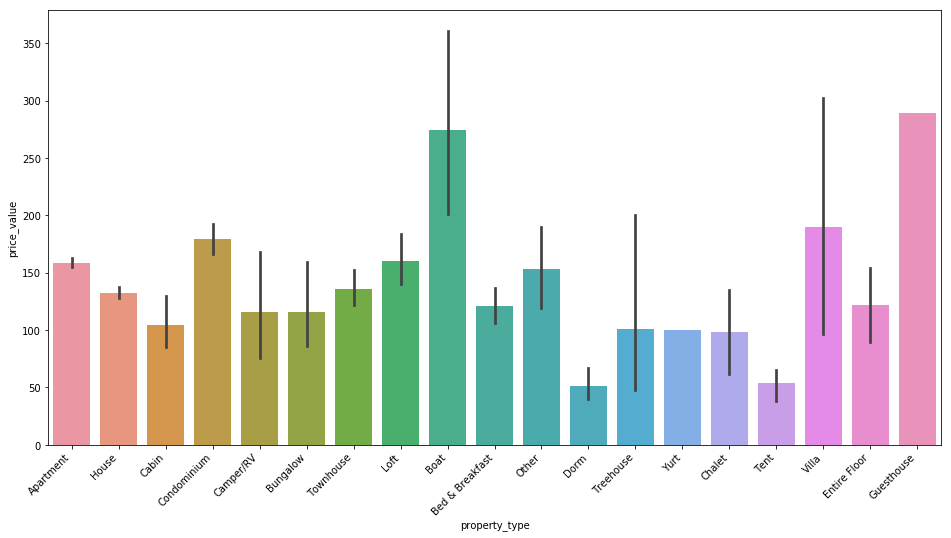

In [21]:
# Bar graph by Property Type #
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.barplot(x='property_type', y='price_value', data=listings_v, ax=ax)
x_labels = listings_v['property_type'].unique()
ax.set_xticklabels(labels=x_labels, rotation=45, ha='right')

***Findings:**

1) Out of 19 different property types in both cities, surprisingly "Guesthouse" appears as most costly (i.e. USD289) property type as compare to the rest and follow by "Boat" and "Villa" with price of USD274 and USD190 respectively.
<br>
2) But costly property types doesn't seem to be favorable by customers. In fact, substantial beds capacity by property type      is the key factor to a guest favouritism during vacation i.e. "Apartment" with max capacity of 16 and "House" with 15.

### Question 3

**Are we able to classify positive or negative comments based on customers reviews ? And, what is the distribution ?**

In [22]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,city
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!,Seattle
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay.",Seattle
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday",Seattle
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.",Seattle
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!,Seattle


In [23]:
# Reset the index
reviews.reset_index(drop=True, inplace=True)

In [24]:
# Number of records and variables
n_records = len(reviews)
n_variables = reviews.shape[1]
n_srecords = len(s_reviews)
n_brecords = len(b_reviews)

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of variables: {}".format(n_variables))
print("Total number of records for Seattle: {}".format(n_srecords))
print("Total number of records for Boston: {}".format(n_brecords))

Total number of records: 153124
Total number of variables: 7
Total number of records for Seattle: 84849
Total number of records for Boston: 68275


In [25]:
# Get variable "comments" only, split by City due to memory error in later session
comments = reviews[['comments']]
s_comments = s_reviews[['comments']]
b_comments = b_reviews[['comments']]
comments.head()

,comments
0,Cute and cozy place. Perfect location to everything!
1,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


In [26]:
# library to clean data 
import re  

# Natural Language Tool Kit 
import nltk  
  
#nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer

In [27]:
## Seattle ##

# Initialize empty array 
# to append clean text  
s_corpus = []  

for i in range(0, 84849):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', str(s_comments['comments'][i]))
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    s_corpus.append(review) 

In [28]:
## Boston ##

# Initialize empty array 
# to append clean text  
b_corpus = []  

for i in range(0, 68275):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', str(b_comments['comments'][i]))
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    b_corpus.append(review) 

In [29]:
count_vector = CountVectorizer()

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """    
    vec = count_vector.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [30]:
## Top 50 common words in both cities ##
s_common_words = get_top_n_words(s_corpus, 50)
b_common_words = get_top_n_words(b_corpus, 50)

In [31]:
## Print top 50 common words in Seattle ##
for word, freq in s_common_words:
    print(word, freq)

stay 70809
great 61002
place 50362
seattl 40345
locat 35919
us 31884
clean 30095
host 29638
comfort 26912
apart 26392
would 26275
nice 24656
hous 23426
walk 22972
room 22306
recommend 22151
home 21218
love 20586
need 20457
time 20125
everyth 19826
neighborhood 19236
easi 18163
well 16579
perfect 16351
realli 16319
downtown 15918
definit 15455
help 14617
get 14442
space 14378
also 14366
bed 14095
welcom 14062
thank 13089
restaur 13033
even 12866
wonder 12860
enjoy 12835
area 12742
made 12588
park 12550
experi 12397
close 12263
quiet 12234
good 11724
like 11634
beauti 10884
arriv 10802
day 10713


In [32]:
## Print top 50 common words in Boston ##
for word, freq in b_common_words:
    print(word, freq)

stay 47908
great 40420
place 33382
boston 32783
apart 28903
locat 28761
clean 24185
host 22800
room 21777
us 21595
nice 19966
would 18926
walk 17303
comfort 16977
recommend 16061
hous 14911
time 14085
everyth 13888
need 13700
easi 13117
help 12654
realli 12612
well 11751
home 11718
good 11665
love 11631
get 11215
perfect 10856
neighborhood 10597
close 10320
also 10291
definit 10079
bed 9407
arriv 9345
welcom 9273
experi 8951
made 8875
thank 8796
area 8698
even 8516
restaur 8166
day 8116
check 7900
night 7894
like 7890
conveni 7854
minut 7737
enjoy 7551
one 7492
back 7099


In [33]:
def overall_reviews(x_corpus, x_reviews):
    
    count_vector.fit(x_corpus)
    x_doc_array = count_vector.transform(x_corpus).toarray()
    # Frequency Matrix for each words from "comments"
    x_frequency_matrix = pd.DataFrame(x_doc_array, 
                                    columns = count_vector.get_feature_names())
    ## Selected most relevant words for "GOOD" comments from Top 50 common words ##
    x_good_comments = x_frequency_matrix[['great', 'nice', 'clean', 'love', 'perfect', 'comfort', 'good', 'enjoy', 'like', 'recommend', 'thank']]
    # Derive the variable "positive comments"
    x_good_comments['positive_comments'] = x_good_comments.apply(lambda x: sum(x), axis=1)
    # Merge the "Positive Comments Flag" to original dataframe
    overall_x_reviews = pd.merge(x_reviews, x_good_comments['positive_comments'], left_index=True, right_index=True, how='left')
    overall_x_reviews['positive_comments_flag'] = ['Y' if x > 0 else 'N' for x in overall_x_reviews['positive_comments']]

    return overall_x_reviews

In [34]:
# Apply the function by City and concatenate the overall reviews
overall_s_reviews = overall_reviews(s_corpus, s_reviews)
overall_b_reviews = overall_reviews(b_corpus, b_reviews)
overall_reviews = pd.concat([overall_s_reviews.assign(city='Seattle'), overall_b_reviews.assign(city='Boston')], sort=False)

C:\Users\eyanney\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [35]:
overall_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,positive_comments,positive_comments_flag,city
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!,1,Y,Seattle
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay.",4,Y,Seattle
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday",1,Y,Seattle
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.",0,N,Seattle
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!,5,Y,Seattle


In [36]:
# Reviews summarize by City
reviews_summarize = overall_reviews.groupby(['city', 'positive_comments_flag']).agg({'id':'count'}).rename(columns={'id':'txns'})
print(reviews_summarize)

                                 txns
city    positive_comments_flag       
Boston  N                       8878 
        Y                       59397
Seattle N                       6090 
        Y                       78759


In [37]:
# To get the positive reviews in %
## Boston ##
b_positive_reviews = overall_reviews.query("city == 'Boston' and positive_comments_flag == 'Y'").count()['id']
b_percentage = b_positive_reviews/b_reviews.shape[0]
print("Percentage of positive reviews in Boston: "+"{:.2%}".format(b_percentage))

## Seattle ##
s_positive_reviews = overall_reviews.query("city == 'Seattle' and positive_comments_flag == 'Y'").count()['id']
s_percentage = s_positive_reviews/s_reviews.shape[0]
print("Percentage of positive reviews in Seattle: "+"{:.2%}".format(s_percentage))

Percentage of positive reviews in Boston: 87.00%
Percentage of positive reviews in Seattle: 92.82%


***Findings:**

Both Boston and Seattle are getting excellent feedback from AirBNB guests and Seattle city is slightly outstanding with ~6p.p.